In [25]:
import numpy as np
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes 
from kmodes.kprototypes import KPrototypes
import kmodes.util 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer 
from scipy.spatial.distance import cdist
import probscale
import plotly.express as px
import seaborn as sns
plt.style.use('seaborn-bright')
%matplotlib inline

data = pd.read_csv("C:/Users/nubem/Desktop/TESIS 2022/BASE DE DATOS/dominios_peru_2.csv", sep=";")
data_origen = data.copy()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,2453.0,4.135867e+05,97.215170,4.133863e+05,4.135138e+05,4.135854e+05,4.136493e+05,4.138687e+05
Y,2453.0,8.029747e+06,134.711709,8.029487e+06,8.029654e+06,8.029740e+06,8.029842e+06,8.030039e+06
Z,2453.0,4.323029e+03,74.261940,4.040564e+03,4.282565e+03,4.339421e+03,4.376240e+03,4.449960e+03
FROM,2453.0,8.112157e+01,64.072169,0.000000e+00,2.855556e+01,6.700000e+01,1.227692e+02,2.925714e+02
TO,2453.0,8.852843e+01,64.177580,2.000000e+00,3.600000e+01,7.450000e+01,1.302000e+02,3.000000e+02
AU,2453.0,1.938895e-01,0.250364,2.500000e-03,2.824215e-02,1.155911e-01,2.495570e-01,2.216000e+00
AG,2453.0,4.389682e+00,5.867870,1.000000e-01,1.796586e-01,2.251414e+00,6.380519e+00,4.003165e+01
CU,1498.0,2.994745e-02,0.064957,2.500000e-07,4.600000e-03,7.111190e-03,2.788775e-02,9.125908e-01
HG,1334.0,7.287069e-04,0.001129,4.000000e-07,1.167675e-04,3.477050e-04,8.521825e-04,1.620000e-02
AS,1424.0,4.835047e-02,0.066214,6.000000e-04,1.901675e-02,3.013411e-02,5.207648e-02,7.385652e-01


In [31]:
df_oxi = data[data["MINTYPE_CODE"]==1]

In [32]:
data1 = df_oxi[["AU", "AG", "CU", "HG", "AS", "S","X", "Y", "Z"]]
data2 = df_oxi[["BHID", "FROM", "TO", "MINTYPE_CODE", "ALT_CODE", "ALT_TEXT", "MINTYPE"]]
s = df_oxi["ALT_TEXT"] #transformación de atributo categorico a conjunto de atributos binarios
z = df_oxi["MINTYPE"] #transformación de atributo categorico a conjunto de atributos binarios
data3 = pd.get_dummies(s)
data4 = pd.get_dummies(z)

In [33]:
data2["row"] = np.arange(0, 922, 1, dtype=int)
data1["row"] = np.arange(0, 922, 1, dtype=int)
data3["row"] = np.arange(0, 922, 1, dtype=int)
data4["row"] = np.arange(0, 922, 1, dtype=int)

df_x = pd.merge(data1, data2, on='row')
df_x2 = pd.merge(data3, data4, on='row')

df = pd.merge(df_x2, df_x, on='row')
df.drop(["row"], axis=1, inplace=True)
data1.drop(["row"], axis=1, inplace=True)
df.describe().T

C:\Users\nubem\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\nubem\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,count,mean,std,min,25%,50%,75%,max
AAR,922.0,5.618221e-01,0.496433,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AR,922.0,2.342733e-01,0.423774,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
SIC,922.0,4.446855e-02,0.206246,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
UA,922.0,2.603037e-02,0.159312,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
VUG,922.0,1.334056e-01,0.340197,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
OX,922.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
AU,922.0,3.269700e-01,0.316867,2.500000e-03,1.231173e-01,2.412037e-01,4.408655e-01,2.216000e+00
AG,922.0,7.282491e+00,6.842520,1.000000e-01,2.275407e+00,5.882530e+00,9.945292e+00,3.728182e+01
CU,240.0,1.065365e-02,0.019380,4.037700e-04,2.757507e-03,5.252315e-03,9.659807e-03,1.547458e-01
HG,172.0,1.402164e-03,0.001703,1.040000e-05,1.540675e-04,8.157650e-04,1.916293e-03,7.880000e-03


In [35]:
subset = ["AU", "AG"] 

df_numerical = df[subset]

X = df_numerical.copy()

X_std = StandardScaler().fit_transform(X) 

df_numerical_trans = pd.DataFrame(X_std)

df_numerical_trans.rename(columns={0:"Au_ppm", 1:"Ag_ppm"}, inplace=True)

df_numerical_trans["AAR"] = df["AAR"]
df_numerical_trans["AR"] = df["AR"]
#df_numerical_trans["CL"] = df["CL"]
df_numerical_trans["SIC"] = df["SIC"]
df_numerical_trans["UA"] = df["UA"]
df_numerical_trans["VUG"] = df["VUG"]


data = np.array(df_numerical_trans)

In [36]:
df_numerical_trans.head()

,Au_ppm,Ag_ppm,AAR,AR,SIC,UA,VUG
0,-0.989473,-0.968188,0,1,0,0,0
1,-0.994616,-1.033408,0,1,0,0,0
2,-0.965232,-0.960041,0,1,0,0,0
3,-0.911665,-1.035632,0,1,0,0,0
4,-0.652741,-0.922309,0,1,0,0,0


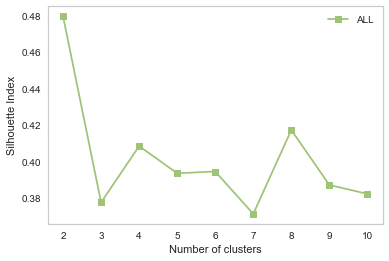

In [37]:
index = []
for k in range(2, 11):
    km = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    clusters = km.fit_predict(data, categorical=[2,3,4,5,6])
    labels = km.labels_
    index.append(silhouette_score(data, labels, metric='euclidean'))
    

plt.plot(range(2, 11), index, 'gs-', label="ALL")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Index')
plt.legend()
plt.grid(False)
plt.xticks(np.arange(min(range(2, 11)), max(range(2, 11))+1, 1.0))
#plt.savefig("C:/Users/nubem/Documents/proyecto_dominios/silueta_oxidos.png", dpi=300) 
plt.show()

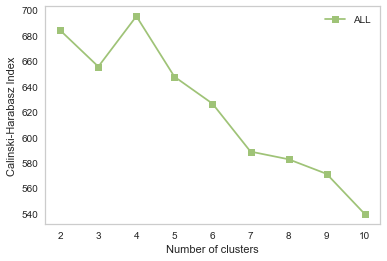

In [38]:
index = []
for k in range(2, 11):
    km = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    clusters = km.fit_predict(data, categorical=[2,3,4,5,6])
    labels = km.labels_
    index.append(metrics.calinski_harabasz_score(data, labels))
    #print(k, metrics.calinski_harabasz_score(data, labels))


plt.plot(range(2, 11), index, 'gs-', label="ALL")

plt.xticks(np.arange(min(range(2, 11)), max(range(2, 11))+1, 1.0))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.legend()
plt.grid(False)

plt.show()

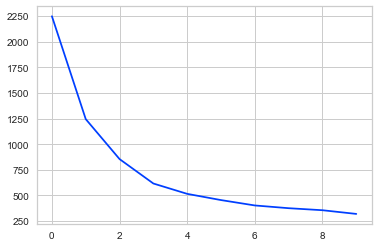

In [39]:
cost = []
for num_clusters in list(range(1,11)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(data, categorical=[2,3,4,5,6])
    cost.append(kproto.cost_)

plt.plot(cost)

In [108]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(data, categorical=[2,3,4,5,6])

In [109]:
kproto.cluster_centroids_

#Categories of cluster centroids

[array([[ 2.01127237,  2.14503113],
        [-0.74630202, -0.86769768],
        [ 0.03036745,  0.07053622]]),
 array([[0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])]

In [110]:
# Checking the cost of the clusters created.
kproto.cost_

#Clustering cost, defined as the sum distance of all points to their respective cluster centroids.

852.8606986674092

In [111]:
# Adding the predicted clusters to the main dataset
df['cluster_id'] = clusters #where blood is the destiny dataframe

In [112]:
df["cluster_id"].replace({0: 1, 1: 2,2:3}, inplace=True)

In [113]:
# Checking the clusters created
df2 = pd.DataFrame(df['cluster_id'].value_counts())
df2

,cluster_id
3,538
2,286
1,98


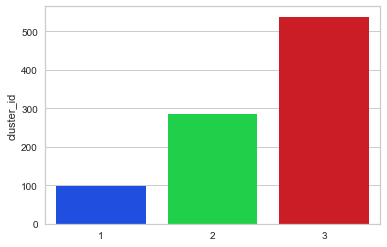

In [114]:
import seaborn as sns
sns.barplot(x=df2.index, y=df2['cluster_id'])


In [115]:
df.head(1)

,AAR,AR,SIC,UA,VUG,OX,AU,AG,CU,HG,...,Y,Z,BHID,FROM,TO,MINTYPE_CODE,ALT_CODE,ALT_TEXT,MINTYPE,cluster_id
0,0,1,0,0,0,1,0.013608,0.661238,0.003556,0.000061,...,8029921.231,4420.348151,CAL001_14,7.43,14.86,1,2,AR,OX,2


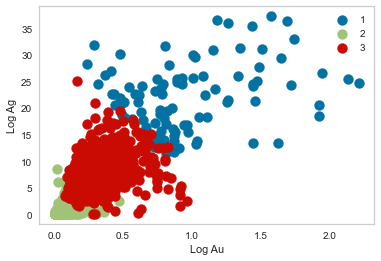

In [116]:
scatter_x = np.array(df["AU"])
scatter_y = np.array(df["AG"])
group = np.array(df["cluster_id"])
cdict = {1: 'b', 2: 'g', 3:"r"}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
    plt.grid(False)
    plt.xlabel("Log Au")
    plt.ylabel("Log Ag")
ax.legend()

plt.show()

In [117]:
df[df["cluster_id"]==1]["ALT_CODE"].sort_values().unique()

array([1, 2, 4, 6], dtype=int64)

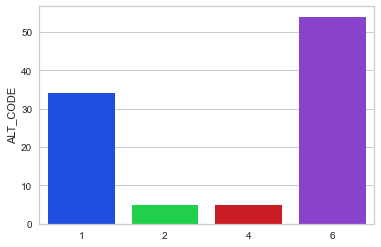

In [135]:
a = pd.DataFrame(df[df["cluster_id"]==1]["ALT_CODE"].value_counts())
sns.barplot(x=a.index, y=a['ALT_CODE'])

In [118]:
df[df["cluster_id"]==2]["ALT_CODE"].sort_values().unique()

array([1, 2, 4, 5, 6], dtype=int64)

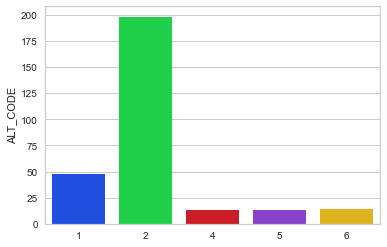

In [126]:
b = pd.DataFrame(df[df["cluster_id"]==2]["ALT_CODE"].value_counts())
sns.barplot(x=b.index, y=b['ALT_CODE'])

In [119]:
df[df["cluster_id"]==3]["ALT_CODE"].sort_values().unique()

array([1, 2, 4, 5, 6], dtype=int64)

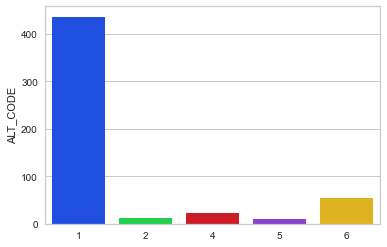

In [127]:
c = pd.DataFrame(df[df["cluster_id"]==3]["ALT_CODE"].value_counts())
sns.barplot(x=c.index, y=c['ALT_CODE'])

In [129]:
data_origen[data_origen["DOMINIO_C"]==1]["ALT_CODE"].sort_values().unique()

array([4, 6], dtype=int64)

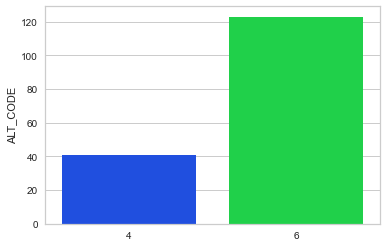

In [132]:
d = pd.DataFrame(data_origen[data_origen["DOMINIO_C"]==1]["ALT_CODE"].value_counts())
sns.barplot(x=d.index, y=d['ALT_CODE'])

In [130]:
data_origen[data_origen["DOMINIO_C"]==2]["ALT_CODE"].sort_values().unique()

array([1], dtype=int64)

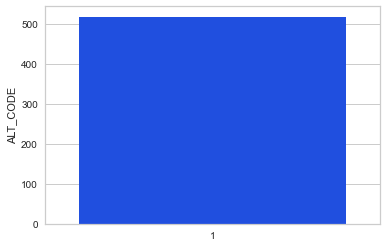

In [133]:
e = pd.DataFrame(data_origen[data_origen["DOMINIO_C"]==2]["ALT_CODE"].value_counts())
sns.barplot(x=e.index, y=e['ALT_CODE'])

In [131]:
data_origen[data_origen["DOMINIO_C"]==3]["ALT_CODE"].sort_values().unique()

array([2, 5], dtype=int64)

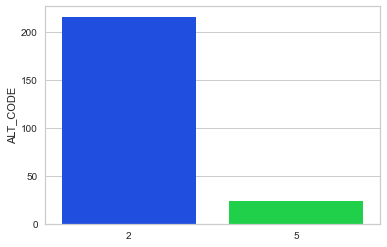

In [134]:
f = pd.DataFrame(data_origen[data_origen["DOMINIO_C"]==3]["ALT_CODE"].value_counts())
sns.barplot(x=f.index, y=f['ALT_CODE'])

In [120]:
fig = px.scatter_3d(df, x="X", y="Y",z="Z", color="cluster_id", 
#fig = px.scatter_3d(data_2022, x="X", y="Y",z="Z", color="MINTYPE_CODE", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()

In [121]:
fig = px.scatter_3d(data_origen[data_origen["MINTYPE_CODE"]==1], x="X", y="Y",z="Z", color="DOMINIO_C", 
#fig = px.scatter_3d(data_2022, x="X", y="Y",z="Z", color="MINTYPE_CODE", 
                    color_continuous_scale=px.colors.sequential.Jet)
fig.update_traces(marker=dict(size=5))
fig.show()